In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor #Случайные леса для классификации и регрессии
# Fit() - для обучении модели. predict() - для прогнозирования. n_estimators - поле для кол-ва деревьев 

In [3]:
from sklearn.metrics import r2_score
# MSE нормированная на [0,1], 1 - лучшее значение.
# Первый параметр массив правельных ответов. Второй - предсказанных

In [5]:
data = pd.read_csv('abalone.csv')

In [14]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,-1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,-1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [13]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [16]:
from sklearn.cross_validation import KFold

In [20]:
from sklearn.cross_validation import cross_val_score

In [17]:
kf = KFold(n=y.size, random_state=1,n_folds=5,shuffle=True)

In [22]:
%time
quality = []
for i in range(1,51):
    rfr = RandomForestRegressor(n_estimators=i,random_state=1)
    quality.append(np.mean(cross_val_score(rfr,X,y,scoring='r2',cv=kf)))

Wall time: 0 ns


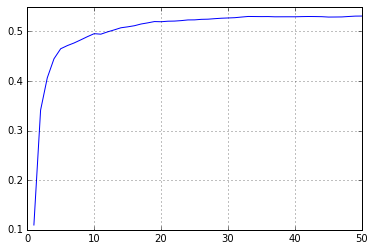

In [26]:
plt.plot(range(1,51),quality)
plt.grid(True)
plt.show()

In [30]:
idx,val = next((x[0],x[1]) for x in enumerate(quality) if x[1] > 0.52 )

In [38]:
for i in range(0,50):
    print i+1,' ',quality[i]

 1   0.109674820689
2   0.341300009637
3   0.406433829066
4   0.444774585754
5   0.465032414268
6   0.471395958259
7   0.476665845189
8   0.482934839422
9   0.489437016295
10   0.495408555243
11   0.494411115577
12   0.499028178666
13   0.503057854956
14   0.507316823462
15   0.509180996956
16   0.511410531418
17   0.514891774773
18   0.517220357317
19   0.519829309533
20   0.519484350338
21   0.520529096464
22   0.520804423008
23   0.521742855686
24   0.52310599698
25   0.523248647049
26   0.524307613928
27   0.524639358846
28   0.525655772497
29   0.526555629306
30   0.527085871584
31   0.527642043823
32   0.528924480639
33   0.530107372264
34   0.529961373426
35   0.529820977913
36   0.529910050668
37   0.529432041514
38   0.529471538867
39   0.52951589835
40   0.529470358038
41   0.529808768521
42   0.530043330614
43   0.529913576409
44   0.529681495792
45   0.52890811235
46   0.529008307033
47   0.529178657165
48   0.530050939632
49   0.530813058616
50   0.530950914742


In [32]:
import os

In [33]:
os.chdir('D:\Leon Projects\Python\Vedenie v ML\Ved ml_week5')

In [41]:
txt = open('subweek5_1_1.txt','w')
txt.write('%s' % 22)
txt.close()